In [1]:
import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
# elem.send_keys(Keys.ENTER)
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
import pymysql

In [2]:
user_agent = 'user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.366'

years = [i for i in range(2020,2023)]
urls = []
for year in years:
    urls.append([])
    for i in range(1,6): #페이지 5번 바뀜
        # 웹페이지 열기
        url = 'https://product.kyobobook.co.kr/bestseller/total?period=004#?page=%d&per=20&period=004&ymw=%d&bsslBksClstCode=A'%(i,year)

        options = webdriver.ChromeOptions()
        options.add_argument(user_agent)
        options.add_argument('headless') # 페이지 안 열기
        options.add_argument('window-size=1920x1080')
        options.add_argument("disable-gpu")
        # 혹은 options.add_argument("--disable-gpu")
        driver = webdriver.Chrome(options=options)
        # driver.maximize_window()
        driver.implicitly_wait(2)
        driver.get(url)
        time.sleep(1)

        # 링크 뽑아오기
        elems = driver.find_elements_by_class_name('prod_link')
        for j in range(20):
            urls[-1].append(elems[j].get_attribute('href'))

# year_urls 딕셔너리에 키는 연도, 값은 연간베스트도서 url 100개짜리 리스트
year_urls = dict(zip(years,urls))

In [3]:
# sql 연결 및 테이블 생성
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='mywork', charset='utf8')
cursor = db.cursor()
sql = """
    CREATE TABLE IF NOT EXISTS best_books(
        years SMALLINT NOT NULL,
        ranks SMALLINT NOT NULL,
        title VARCHAR(100),
        author VARCHAR(100),
        publisher VARCHAR(100),
        publishdate DATE,
        price INT,
        rate DOUBLE,
        likes VARCHAR(50),
        review_n INT,
        genre VARCHAR(50));"""
cursor.execute(sql)

0

In [4]:
# 테이블 채우기
for key, value in year_urls.items():
    # years <- key
    for i in range(len(value)):
        print(key, i+1)
        # ranks <- i+1
        
        headers = {'User-Agent':user_agent}
        response = requests.get(value[i], headers) # value[i]가 각 도서링크
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'lxml')
        
        title = soup.select_one('div.prod_title_area h1').text.replace(' ', '').replace('\n', '')
        # title <- title

        author = soup.select_one('div.author').text.replace(' ', '').replace('\n', '').split('저')
        # author <- author[0]

        publish_info = soup.select_one('div.prod_info_text.publish_date').text
        publish_info = publish_info.replace(' ', '').replace('\n', '').split('·')
        # publisher <- publish_info[0]
        datetime_format = "%Y년%m월%d일"
        publishdate = datetime.strptime(publish_info[1][:11], datetime_format).date()
        # publishdate <- publishdate

        price = soup.select_one('span.price span.val').text.replace('원', '').replace(',', '')
        # price <- price
        
        rating = soup.select_one('span.review_score.feel_lucky').text
        # rate <- rating

        like = soup.select_one('span.review_quotes_text').text
        # likes <- like

        cnt_review = soup.select_one('span.review_desc span.val').text
        # review_n <- cnt_review
        
        genere = soup.select('ol li.breadcrumb_item a')
        # genre <- genere[2].text
        
        sql = '''INSERT INTO best_books VALUES(
        {0}, {1}, "{2}", "{3}", "{4}", "{5}", {6}, {7}, "{8}", {9}, "{10}");
        '''.format(key, i+1, title, author[0], publish_info[0], publishdate, 
                   int(price), float(rating), like, int(cnt_review), genere[2].text)
        cursor.execute(sql)
        
db.commit()
db.close

2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12
2020 13
2020 14
2020 15
2020 16
2020 17
2020 18
2020 19
2020 20
2020 21
2020 22
2020 23
2020 24
2020 25
2020 26
2020 27
2020 28
2020 29
2020 30
2020 31
2020 32
2020 33
2020 34
2020 35
2020 36
2020 37
2020 38
2020 39
2020 40
2020 41
2020 42
2020 43
2020 44
2020 45
2020 46
2020 47
2020 48
2020 49
2020 50
2020 51
2020 52
2020 53
2020 54
2020 55
2020 56
2020 57
2020 58
2020 59
2020 60
2020 61
2020 62
2020 63
2020 64
2020 65
2020 66
2020 67
2020 68
2020 69
2020 70
2020 71
2020 72
2020 73
2020 74
2020 75
2020 76
2020 77
2020 78
2020 79
2020 80
2020 81
2020 82
2020 83
2020 84
2020 85
2020 86
2020 87
2020 88
2020 89
2020 90
2020 91
2020 92
2020 93
2020 94
2020 95
2020 96
2020 97
2020 98
2020 99
2020 100
2021 1
2021 2
2021 3
2021 4
2021 5
2021 6
2021 7
2021 8
2021 9
2021 10
2021 11
2021 12
2021 13
2021 14
2021 15
2021 16
2021 17
2021 18
2021 19
2021 20
2021 21
2021 22
2021 23
2021 24
2021 25
2021 26
2021 27
2

<bound method Connection.close of <pymysql.connections.Connection object at 0x000002D8270DE340>>

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

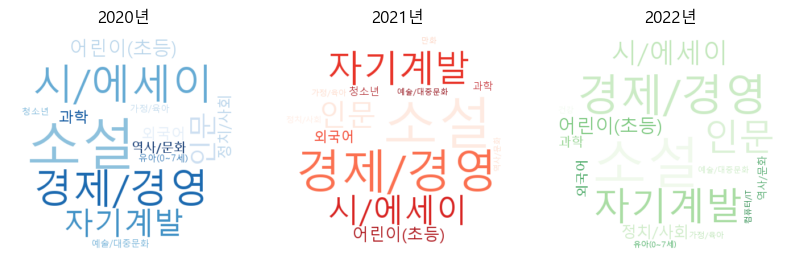

In [16]:
# 연도별로 출력하기

# 1. 라이브러리 가져오기
import pymysql
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

cand_mask=np.array(Image.open('circle.jpg'))
# 2. 접속하기
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='mywork', charset='utf8')
colors = ['Blues','Reds','Greens'] 

plt.figure(figsize=(10,10))
# 2020년부터 2022년까지
years = [i for i in range(2020,2023)]
i = 1
for year in years:

    # 3. 커서 가져오기
    cursor = db.cursor()

    # 4. SQL 구문 만들기
    SQL = """SELECT
        genre,
        count(*)
    FROM
        best_books_copy
    WHERE
        years = {}
    GROUP BY
        genre
    """.format(year)
    cursor.execute(SQL)
    res = cursor.fetchall()
    
    # tuple -> dictionary
    dict_res = dict((x,y)for x,y in res)
    
    # wrodcloud 생성
    wordcloud = WordCloud(
    font_path='malgun.ttf',
    background_color='white',
    colormap=colors[i-1],
    mask=cand_mask,).generate_from_frequencies(dict_res)

    plt.subplot(1,3,i)
    i+=1
    #사이즈 설정 및 출력

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title('{}년'.format(year))
    plt.axis('off')

<function matplotlib.pyplot.show(close=None, block=None)>

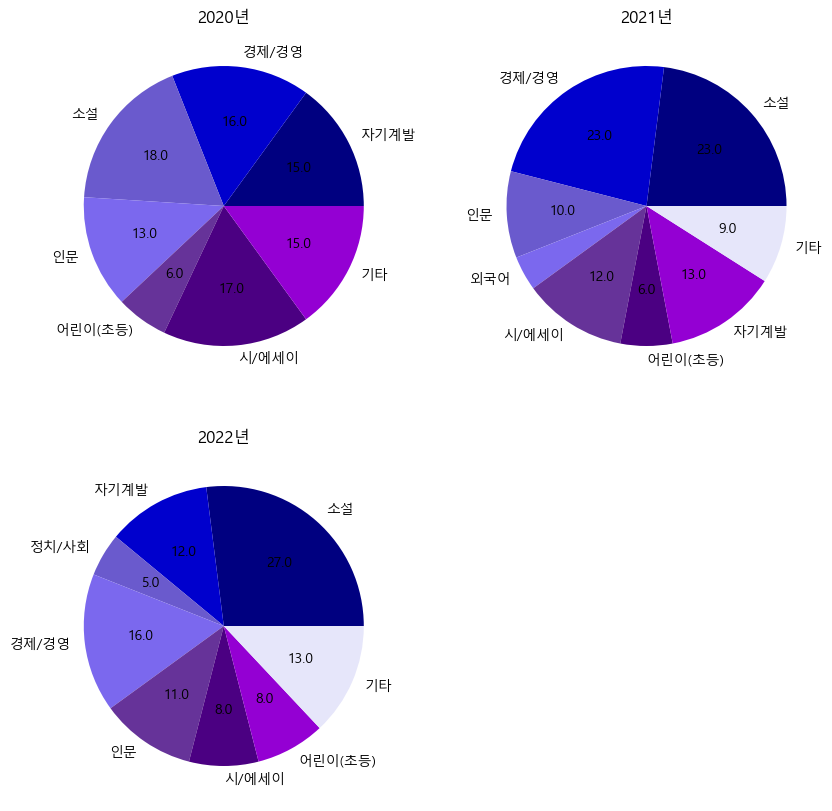

In [17]:
# 연도별로 출력하기

# 1. 라이브러리 가져오기
import pymysql
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import *

# 2. 접속하기
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='1234', db='mywork', charset='utf8')

plt.figure(figsize=(10,10))
colors = ['navy','mediumblue','slateblue','mediumslateblue','rebeccapurple','indigo','darkviolet','lavender']

# 2020년부터 2022년까지
years = [i for i in range(2020,2023)]
i = 1
for year in years:

    # 3. 커서 가져오기
    cursor = db.cursor()

    # 4. SQL 구문 만들기
    SQL = """with sub as (
    SELECT genre, count(*) c FROM best_books_copy
    WHERE years = {} GROUP BY genre)
    select * from  sub a where a.c > 3
    union
    select concat('기타') genre, sum(b.c) c from sub b where b.c <= 3;
    """.format(year)
    cursor.execute(SQL)
    res = cursor.fetchall()
    
    # tuple -> dictionary
    dict_res = dict((x,y)for x,y in res)
    
    ratio = []
    labels = []
    for key, value in dict_res.items():
        labels.append(key)
        ratio.append(value)
    
    plt.subplot(2,2,i)
    i+=1
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.pie(ratio, labels=labels, autopct=(lambda x: str(round(x,0)) if x > 5 else ' '), colors=colors)
    
    plt.title('{}년'.format(year))

# 책이 3권 이하로 싹 기타로?
# plt.legend(labels, loc='upper right')    
plt.show